<a href="https://colab.research.google.com/github/rominarg/Challenge_Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion Datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda['lat']

,lat
0,4.60971
1,6.25184
2,10.39972
3,3.43722
4,6.25184
...,...
2354,6.25184
2355,4.60971
2356,3.43722
2357,1.21361


# ** 1. ANÁLISIS DE FACTURACIÓN**


In [ ]:
# Ajustes previos para la visualización
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)

# Crear lista con los DataFrames
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]

print("********** FACTURACIÓN TOTAL POR TIENDA **********\n")

# Función que calcula la facturación por tienda
def imprimir_facturacion(tiendas):
    contador = 1
    lista_aux = []
    for facturacion in tiendas:
        monto = sum(facturacion["Precio"])
        lista_aux.append(monto)
        print(f"Facturación total de la Tienda {contador}: {monto:,.2f}\n")
        contador += 1
    return lista_aux

# Ejecutar la función
facturacion_por_tienda = imprimir_facturacion(lista_tiendas)


********** FACTURACIÓN TOTAL POR TIENDA **********

Facturación total de la Tienda 1: 1,150,880,400.00

Facturación total de la Tienda 2: 1,116,343,500.00

Facturación total de la Tienda 3: 1,098,019,600.00

Facturación total de la Tienda 4: 1,038,375,700.00



## Visualización de los resultados (facturación)

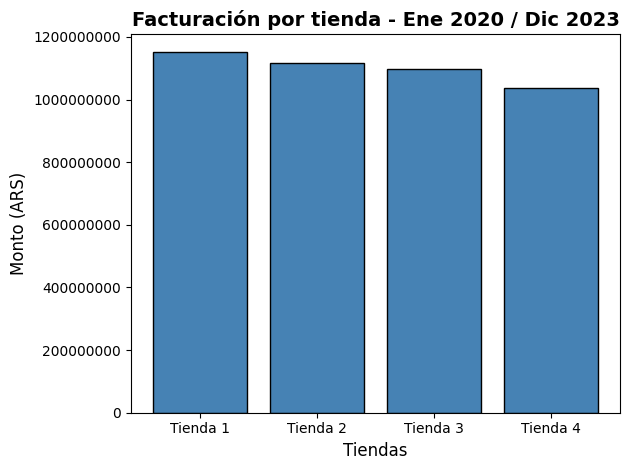

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de las tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Facturación calculada previamente
facturacion = facturacion_por_tienda

# Crear gráfico de barras
plt.bar(tiendas, facturacion, color="steelblue", edgecolor="black")

# Título y etiquetas
plt.title("Facturación por tienda - Ene 2020 / Dic 2023", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Monto (ARS)", fontsize=12)

# Evitar notación científica
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Mostrar el gráfico
plt.tight_layout()


### **02. VENTAS POR CATEGORÍA**

In [ ]:
# Diccionario con los nombres de las tiendas
nombre_tiendas = {"tiendas": ["TIENDA 1", "TIENDA 2", "TIENDA 3", "TIENDA 4"]}

# Crear lista con categorías únicas de productos
lista_categorias = []
for categoria in tienda["Categoría del Producto"]:
    if categoria not in lista_categorias:
        lista_categorias.append(categoria)


def monto_categoria(df):
    """
    Calcula el monto total de facturación por categoría de producto
    para una tienda específica.

    Parámetros:
        df (DataFrame): Datos de una tienda (contiene 'Categoría del Producto' y 'Precio')

    Retorna:
        list: Lista con los montos por cada categoría
    """
    montos_por_categoria = []
    for categoria in lista_categorias:
        monto_total = df.loc[df['Categoría del Producto'] == categoria, 'Precio'].sum()
        montos_por_categoria.append(monto_total)
    return montos_por_categoria


# Listas con los montos por categoría de cada tienda
monto_categoria_tienda_1 = monto_categoria(tienda)
monto_categoria_tienda_2 = monto_categoria(tienda2)
monto_categoria_tienda_3 = monto_categoria(tienda3)
monto_categoria_tienda_4 = monto_categoria(tienda4)

# Agrupar todas las listas en una sola
listas_monto_categoria = [
    monto_categoria_tienda_1,
    monto_categoria_tienda_2,
    monto_categoria_tienda_3,
    monto_categoria_tienda_4
]

# Construir diccionario con facturación por categoría en cada tienda
tabla_montos_categoria = {}
for i, categoria in enumerate(lista_categorias):
    tabla_montos_categoria[categoria] = [montos[i] for montos in listas_monto_categoria]

# Combinar con los nombres de tiendas
tabla_montos_categoria = {**nombre_tiendas, **tabla_montos_categoria}

# Mostrar tabla en pantalla
print("------ TABLA: FACTURACIÓN POR CATEGORÍA -----\n")
pd.DataFrame(tabla_montos_categoria)


------ TABLA: FACTURACIÓN POR CATEGORÍA -----



,tiendas,Electrónicos,Muebles,Juguetes,Electrodomésticos,Artículos para el hogar,Deportes y diversión,Libros,Instrumentos musicales
0,TIENDA 1,429493500.0,187633700.0,17995700.0,363685200.0,12698400.0,39290000.0,8784900.0,91299000.0
1,TIENDA 2,410831100.0,176426300.0,15945400.0,348567800.0,14746900.0,34744500.0,10091200.0,104990300.0
2,TIENDA 3,410775800.0,201072100.0,19401100.0,329237900.0,15060000.0,35593100.0,9498700.0,77380900.0
3,TIENDA 4,409476100.0,192528900.0,20262200.0,283260200.0,15074500.0,33350100.0,9321300.0,75102400.0


### Cantidad de productos vendidos por categoría

In [ ]:
# Función que cuenta la cantidad de productos vendidos por categoría
def cantidad_productos(df):
    """
    Calcula la cantidad de productos vendidos por cada categoría
    en una tienda.

    Parámetros:
        df (DataFrame): Datos de una tienda (incluye 'Categoría del Producto').

    Retorna:
        list: Lista con la cantidad de productos vendidos por categoría.
    """
    cantidades_por_categoria = []
    for categoria in lista_categorias:
        cantidad = (df['Categoría del Producto'] == categoria).sum()
        cantidades_por_categoria.append(cantidad)
    return cantidades_por_categoria


# Listas con la cantidad de productos vendidos por categoría en cada tienda
cantidad_productos_tienda_1 = cantidad_productos(tienda)
cantidad_productos_tienda_2 = cantidad_productos(tienda2)
cantidad_productos_tienda_3 = cantidad_productos(tienda3)
cantidad_productos_tienda_4 = cantidad_productos(tienda4)

# Agrupar todas las listas en una sola
productos_por_tienda = [
    cantidad_productos_tienda_1,
    cantidad_productos_tienda_2,
    cantidad_productos_tienda_3,
    cantidad_productos_tienda_4
]

# Crear diccionario con la cantidad de productos por categoría
tabla_cantidad_productos = {}
total_por_producto = []  # Totales por categoría considerando todas las tiendas

for i, categoria in enumerate(lista_categorias):
    cantidades = [productos[i] for productos in productos_por_tienda]
    total_por_producto.append(sum(cantidades))
    tabla_cantidad_productos[categoria] = cantidades

# Combinar con nombres de tiendas
tabla_cantidad_productos = {**nombre_tiendas, **tabla_cantidad_productos}

# Mostrar tabla en pantalla
print("------ TABLA: PRODUCTOS VENDIDOS POR CATEGORÍA -----\n")
pd.DataFrame(tabla_cantidad_productos)

------ TABLA: PRODUCTOS VENDIDOS POR CATEGORÍA -----



,tiendas,Electrónicos,Muebles,Juguetes,Electrodomésticos,Artículos para el hogar,Deportes y diversión,Libros,Instrumentos musicales
0,TIENDA 1,448,465,324,312,171,284,173,182
1,TIENDA 2,422,442,313,305,181,275,197,224
2,TIENDA 3,451,499,315,278,177,277,185,177
3,TIENDA 4,451,480,338,254,201,277,187,170


# Visualización de resultados - ventas por categoría:

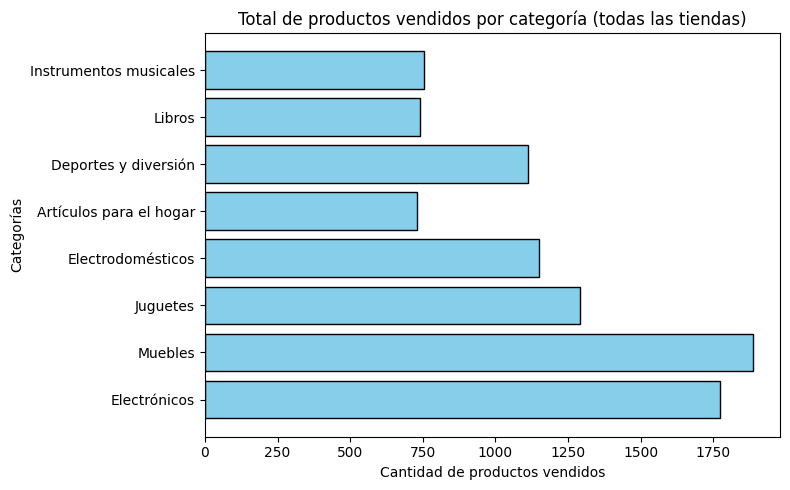

In [ ]:
# Gráfico de barras horizontales: total de productos vendidos por categoría
plt.figure(figsize=(8, 5))
plt.barh(lista_categorias, total_por_producto, color="skyblue", edgecolor="black")

plt.title("Total de productos vendidos por categoría (todas las tiendas)")
plt.xlabel("Cantidad de productos vendidos")
plt.ylabel("Categorías")
plt.tight_layout()
plt.show()

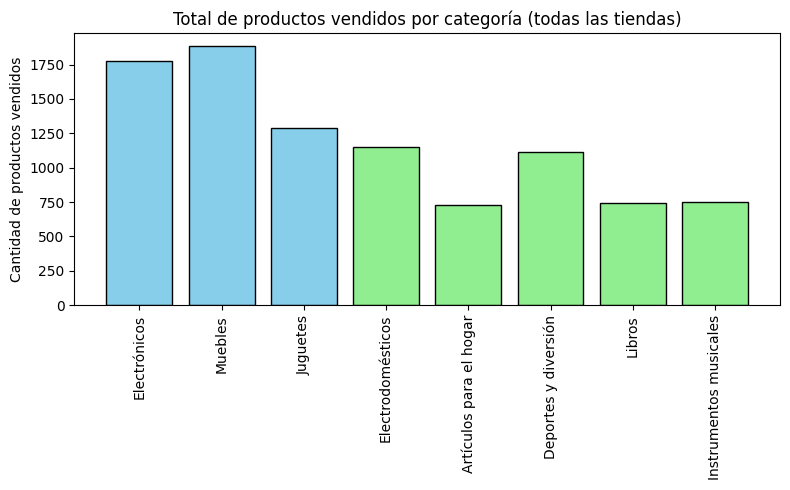

En color celeste se muestran las categorías más vendidas.


In [ ]:
color_barra = ['skyblue', 'skyblue', 'skyblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.bar(lista_categorias, total_por_producto, color=color_barra, edgecolor="black")

plt.title("Total de productos vendidos por categoría (todas las tiendas)")
plt.ylabel("Cantidad de productos vendidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("En color celeste se muestran las categorías más vendidas.")

### **Gráfico circular (Pie chart) de las ventas de productos por categoría**

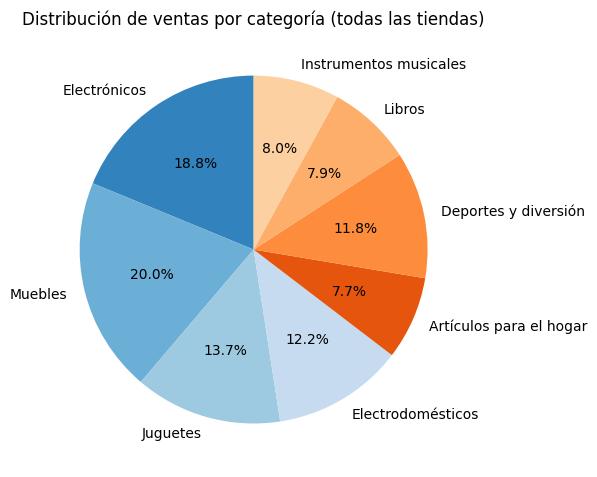

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    total_por_producto,
    labels=lista_categorias,
    autopct='%1.1f%%',       # muestra porcentaje en cada sector
    startangle=90,            # rota el inicio del gráfico para mejor visualización
    colors=plt.cm.tab20c.colors  # paleta de colores consistente y variada
)
plt.title("Distribución de ventas por categoría (todas las tiendas)")
plt.tight_layout()
plt.show()

### Ventas por categoría y por tienda

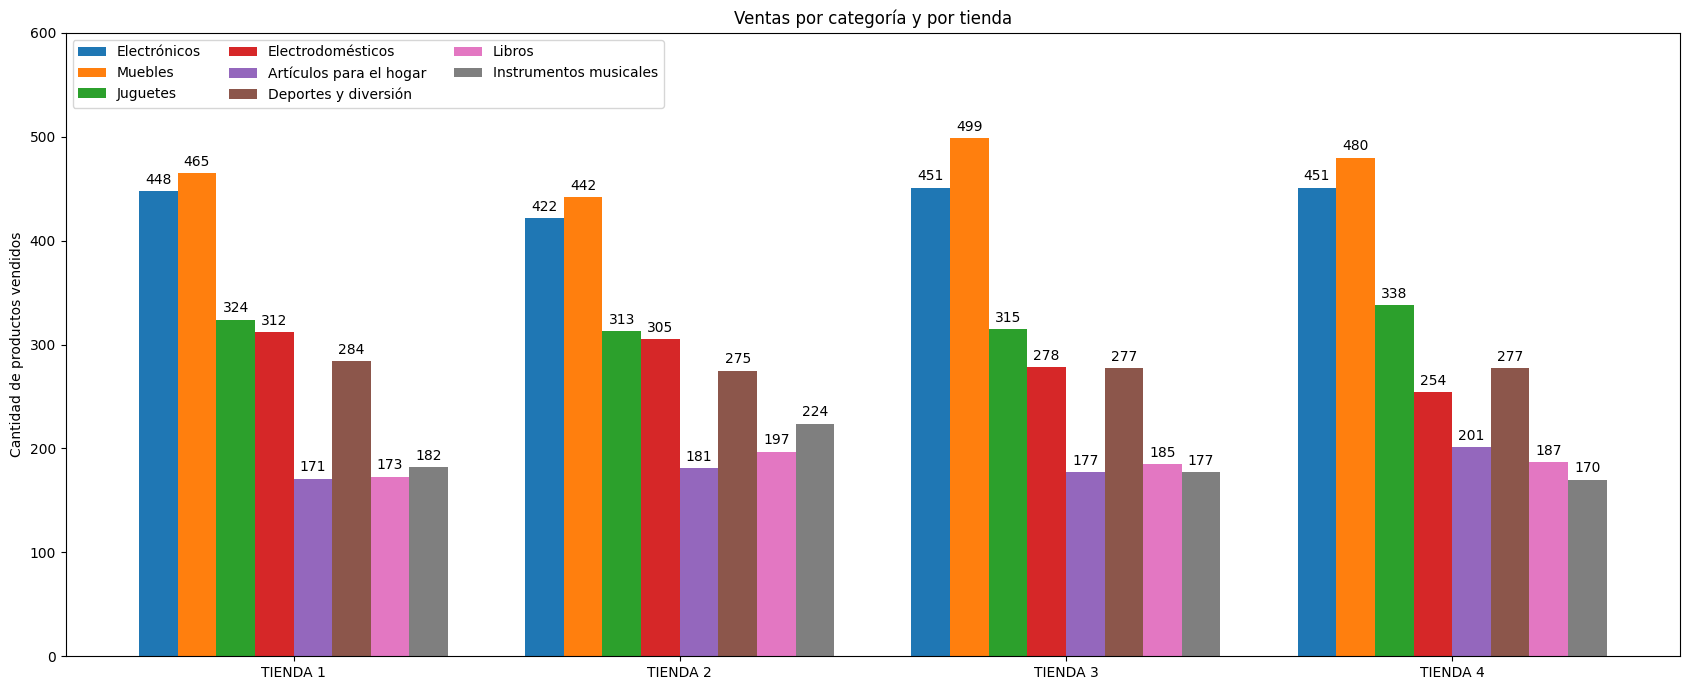

In [ ]:
# Lista con los nombres de las tiendas
nombre_tiendas = tabla_cantidad_productos["tiendas"]

# Diccionario con la cantidad de productos vendidos por categoría, excluyendo la clave "tiendas"
categorias_ventas = {clave: valores for clave, valores in tabla_cantidad_productos.items() if clave != "tiendas"}

# Posición de las etiquetas en el eje X
x = np.arange(len(nombre_tiendas))

# Ancho de cada barra y multiplicador para separar categorías
ancho_barra = 0.10
multiplicador = 0

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(17, 7))

# Dibujar barras para cada categoría de producto
for categoria, cantidad in categorias_ventas.items():
    offset = ancho_barra * multiplicador
    contenedor = ax.bar(x + offset, cantidad, ancho_barra, label=categoria)
    ax.bar_label(contenedor, padding=3)  # muestra la cantidad encima de cada barra
    multiplicador += 1

# Configuración de la gráfica
ax.set_ylabel("Cantidad de productos vendidos")
ax.set_title("Ventas por categoría y por tienda")
ax.set_xticks(x + ancho_barra * 3.5)  # centra las etiquetas
ax.set_xticklabels(nombre_tiendas)    # nombres de tiendas en el eje X
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 600)                   # límite del eje Y
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **03. Calificación Promedio Por Tienda**

In [1]:
# Función para calcular el promedio de calificaciones de cada tienda
def promedio_calificaciones(datos_tiendas):
    """
    Devuelve la calificación promedio de cada tienda a partir de una lista de DataFrames.

    Parámetros:
        datos_tiendas (list): Lista de DataFrames, cada uno con una columna 'Calificación'

    Retorna:
        list: Promedios de calificación por tienda
    """
    promedios = []  # lista donde se guardarán los promedios
    for tienda_df in datos_tiendas:
        promedio = tienda_df["Calificación"].mean()  # calcular promedio directamente
        promedios.append(promedio)
    return promedios

# Calcular los promedios de calificación para todas las tiendas
calificaciones_promedio = promedio_calificaciones(lista_tiendas)

# Mostrar los resultados en pantalla usando un objeto Series de pandas

pd.Series(calificaciones_promedio, index=tiendas)


NameError: name 'lista_tiendas' is not defined

### **Preparación de datos para gráfica de calificaciones por tienda**

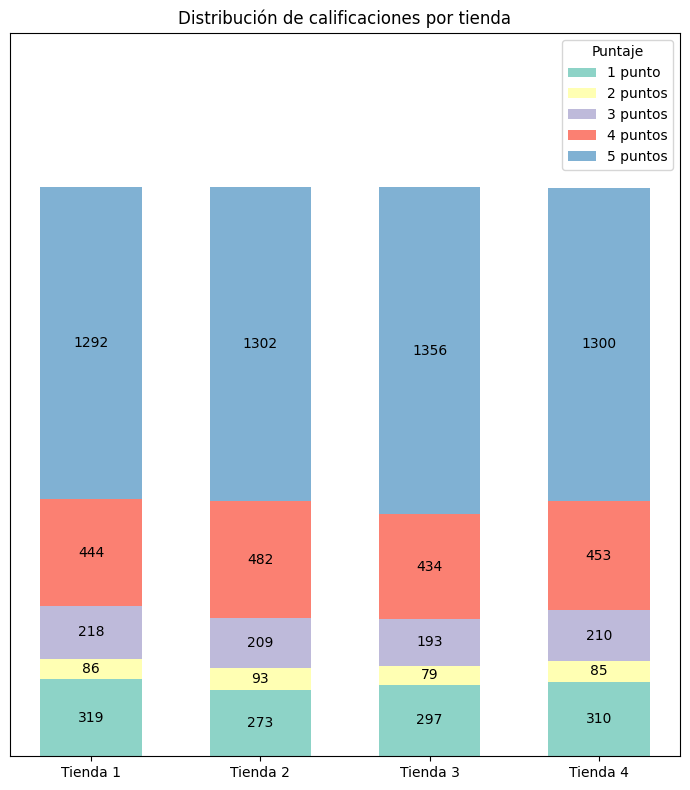

In [ ]:
# Lista para almacenar los conteos de cada puntaje por tienda
conteos_por_puntaje = []

# Calcular la cantidad de calificaciones de 1 a 5 para cada tienda
for puntaje in range(1, 6):
    conteos = [list(tienda['Calificación']).count(puntaje) for tienda in lista_tiendas]
    conteos_por_puntaje.append(conteos)

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas que representan cada puntaje
etiquetas_puntaje = ["1 punto", "2 puntos", "3 puntos", "4 puntos", "5 puntos"]

# Crear diccionario con los datos para la gráfica apilada
datos_barras = {etiqueta: valores for etiqueta, valores in zip(etiquetas_puntaje, conteos_por_puntaje)}

# Configuración de la gráfica
ancho_barras = 0.6
fig, ax = plt.subplots(figsize=(7, 8))
bottom = np.zeros(len(tiendas))  # Para apilar las barras

# Paleta de colores distinta para cada puntaje
colores = cm.Set3.colors  # colores suaves y variados

# Dibujar barras apiladas para cada puntaje
for i, (etiqueta, valores) in enumerate(datos_barras.items()):
    contenedor = ax.bar(tiendas, valores, ancho_barras, label=etiqueta, bottom=bottom, color=colores[i % len(colores)])
    bottom += valores
    ax.bar_label(contenedor, label_type="center")  # mostrar cantidad dentro de cada barra

# Configuración final de la gráfica
ax.set_title("Distribución de calificaciones por tienda")
ax.legend(title="Puntaje")
ax.set_ylim(0, 3000)
ax.yaxis.set_major_locator(ticker.NullLocator())  # ocultar ticks del eje Y
plt.tight_layout()
plt.show()


### **04. Productos más y menos vendidos**

In [ ]:
# Obtener la lista de productos únicos en la primera tienda
nombre_productos = tienda['Producto'].unique()
nombre_productos.sort()

# Diccionario temporal para almacenar nombres de productos
dic_temp = {"Producto": nombre_productos}

# Lista para almacenar la cantidad de cada producto vendido por tienda
conteos_productos_por_tienda = []
for una_tienda in lista_tiendas:
    conteos = [list(una_tienda["Producto"]).count(prod) for prod in nombre_productos]
    conteos_productos_por_tienda.append(conteos)

# Crear un diccionario con cada tienda y su lista de cantidades vendidas
tabla_cantidad_productos = {nombre_tienda: valores for nombre_tienda, valores in zip(tiendas, conteos_productos_por_tienda)}

# Agregar la columna de nombres de productos al diccionario
tabla_cantidad_productos = {**dic_temp, **tabla_cantidad_productos}

# Crear DataFrame a partir del diccionario final
tabla_productos = pd.DataFrame(tabla_cantidad_productos)

# Mostrar la tabla completa con las cantidades vendidas de todos los productos por tienda
tabla_productos

,Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Ajedrez de madera,49,45,47,39
1,Armario,60,54,49,34
2,Asistente virtual,40,38,39,50
3,Auriculares,50,37,43,44
4,Auriculares con micrófono,33,44,39,42
5,Balón de baloncesto,55,42,50,50
6,Balón de voleibol,42,46,48,48
7,Batería,53,61,41,48
8,Bicicleta,54,45,52,45
9,Bloques de construcción,56,54,35,54


### **05. Envío promedio por tienda**

In [ ]:
# Lista donde guardaremos los promedios
envio_promedio_por_tienda = []

# Recorremos cada tienda y calculamos el promedio de envío
for idx, tienda in enumerate(lista_tiendas, start=1):
    promedio_envio = sum(tienda["Costo de envío"]) / len(tienda["Costo de envío"])
    envio_promedio_por_tienda.append(promedio_envio)
    print(f"Costo de envío promedio de la Tienda {idx}: ${promedio_envio:,.2f}")

Costo de envío promedio de la Tienda 1: $26,018.61
Costo de envío promedio de la Tienda 2: $25,216.24
Costo de envío promedio de la Tienda 3: $24,805.68
Costo de envío promedio de la Tienda 4: $23,459.46


### **Visualización del envío promedio por tienda**

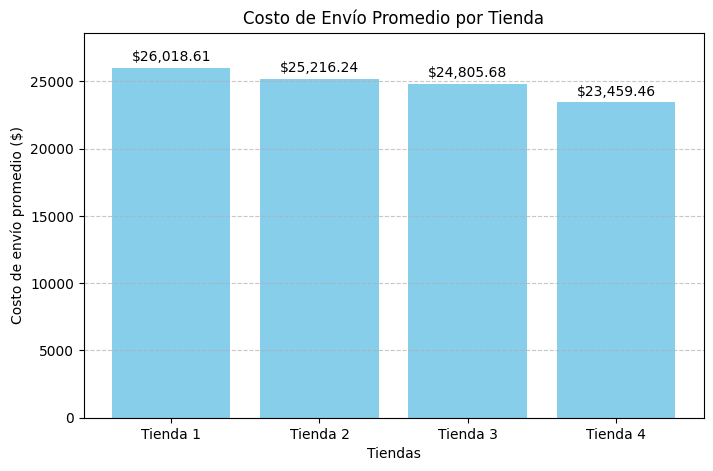

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que ya tenemos la lista de promedios
# envio_promedio_por_tienda = [26018.61, 25216.24, 24805.68, 23459.46]

# Nombres de las tiendas
nombres_tiendas = [f"Tienda {i}" for i in range(1, len(envio_promedio_por_tienda)+1)]

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, envio_promedio_por_tienda, color='skyblue')
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío promedio ($)")
plt.ylim(0, max(envio_promedio_por_tienda)*1.1)  # un poco más de espacio arriba
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores encima de cada barra
for i, valor in enumerate(envio_promedio_por_tienda):
    plt.text(i, valor + 500, f"${valor:,.2f}", ha='center')

plt.show()

### **Conclusiones**

## Facturación total

La Tienda 1 es la que más factura, seguida por la Tienda 2, Tienda 3 y finalmente la Tienda 4, que registra la facturación más baja. Esto indica que la Tienda 4 genera menores ingresos y podría ser la candidata a vender si se busca optimizar la inversión.

## Productos más y menos vendidos / Categorías populares

Las tiendas con mayor facturación coinciden con aquellas que tienen productos más vendidos y categorías populares bien definidas.

La Tienda 4 muestra menor diversidad y volumen de ventas por producto, lo que refuerza su bajo rendimiento.

## Promedio de evaluación de clientes

Todas las tiendas presentan un promedio de satisfacción relativamente alto, pero la Tienda 1 mantiene las mejores evaluaciones, lo que sugiere que la experiencia del cliente es más positiva allí.

La Tienda 4, aunque con buena calificación, no logra compensar la baja facturación y menor volumen de ventas.

## Costo promedio de envío

La Tienda 4 tiene el costo promedio de envío más bajo (23,459.46), mientras que la Tienda 1 tiene el más alto(26,018.61).

Sin embargo, el bajo costo de envío de la Tienda 4 no se traduce en mayor venta, por lo que no impacta significativamente en su rendimiento general.

## ¿Qué le Sugerimos a Juan?
Considerando el análisis realizado sobre ingresos, categorías de productos, calificaciones y costos de envío, se concluye que la Tienda 4 es la que menor volumen de facturación presenta. Por lo tanto, si la decisión de venta se basa principalmente en el lucro, se recomienda al Sr. Juan que proceda a vender la Tienda 4. Las demás tiendas, en particular la Tienda 1, deberían mantenerse y evaluarse para mejorar la atención al cliente y la logística de envíos.